---
<div align = "center">

# Lunar Lander
</div>

---

---
<div align="center">

## Project Overview
</div>

---

This project explores the impact of customizing an ``OpenAI Gym Environment`` on **reinforcement learning (RL) performance**. We modified an existing Gym environment - Lunar Lander - in order to train an RL agent using the Stable Baselines library, and later compare results between the **customized and original environments**.

The process involves:

- **Environment Customization**: **Implement changes** such as altered rewards or added challenges to the Environment.
- **Agent Training**: Train an RL agent with **algorithms like PPO** and further **tune their hyperparameters** to ensure optimal performance.
- **Evaluation**: **Compare agent performance** in both environments to analyze the effect of the customizations.

This project aims to analyse **how does the environment design influence the outcomes of a Reinforcement Learning Algorithm**.

---
## Dependencies
---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import gymnasium as gym
import numpy as np
import math

from stable_baselines3 import (PPO)
from stable_baselines3.common.env_util import (make_vec_env)
from stable_baselines3.common.vec_env import (SubprocVecEnv)
from stable_baselines3.common.callbacks import (CheckpointCallback, EveryNTimesteps)

from Configuration import (CONFIG, PATHS_CONFIG,
                            PPO_SETTINGS_1, PPO_SETTINGS_2,
                            DQN_SETTING_1, DQN_SETTING_2)
from Environment import (MyLunarLander)
from LunarLanderManager import (LunarLanderManager)
from DataVisualization import (plotModelsTrainingPerformance, plotModelSettingsPerformance, plotModelsOverallPerformances)

---
## Original Environment
---

Initially let's create the Original Lunar Lander Environment and define a Reinforcement Learning Model to be trained.

In [4]:
# Define the name of the Original Environment
originalEnv = 'LunarLander'

---
### PPO (Setting 1)
---

The initial settings for the Proximal Policy Optimization (PPO) algorithm emphasize the key concepts of **stability**, **efficiency**, and **exploration**:

- **Environment Interactions (`n_steps`)**:
  - Set to `2048`, this governs how many environment interactions are collected before each update.
  - Ensures a sufficient batch of data to learn from while maintaining computational feasibility.

- **Clipped Updates (`clip_range`)**:
  - Starts at `0.2` to ensure that the policy does not deviate too drastically in a single update.
  - This stabilizes learning, a fundamental aspect of PPO's mechanism.

- **Generalized Advantage Estimation (`gae_lambda`)**:
  - Set to `0.95`, it enhances the algorithm's ability to balance the **bias-variance trade-off** in advantage calculations.
  - Results in smoother and more stable policy updates.

- **Discount Factor (`gamma`)**:
  - Set at `0.99`, it reflects the algorithm's focus on optimizing cumulative future rewards, a core concept in reinforcement learning.

- **Multiple Training Epochs (`n_epochs`)**:
  - Configured to `10`, this allows the policy and value networks to learn effectively from collected rollouts.

- **Batch Size (`batch_size`)**:
  - Set to `64`, it ensures efficient updates while reducing noise in gradient estimates.

- **Entropy Coefficient (`ent_coef`)**:
  - Set to `0.001`, it introduces controlled randomness, encouraging exploration and preventing premature convergence to suboptimal solutions.

<!-- ### Summary
These settings are designed to align closely with PPO's principles, striking a balance between robustness and adaptability. This makes them well-suited for exploring and optimizing the challenging **Lunar Lander** environment. -->

In [5]:
# Create a instance of the Lunar Lander Manager
originalSetup1PPO = LunarLanderManager(environmentName=originalEnv, algorithm='PPO', settingsNumber=1, algorithmSettings=PPO_SETTINGS_1)

In [6]:
# Check if the Environment is working
originalSetup1PPO.testRandomAction()

In [7]:
# Train the Model
model = originalSetup1PPO.train()

Already Trained the Model over the established TimeSteps (Defined inside the CONFIG Dictionary).


In [8]:
# Test the Model over 1 Episode 
# ppoSetup1.test(model=model, numEpisodes=1)
originalSetup1PPO.test(model=model, numEpisodes=1)

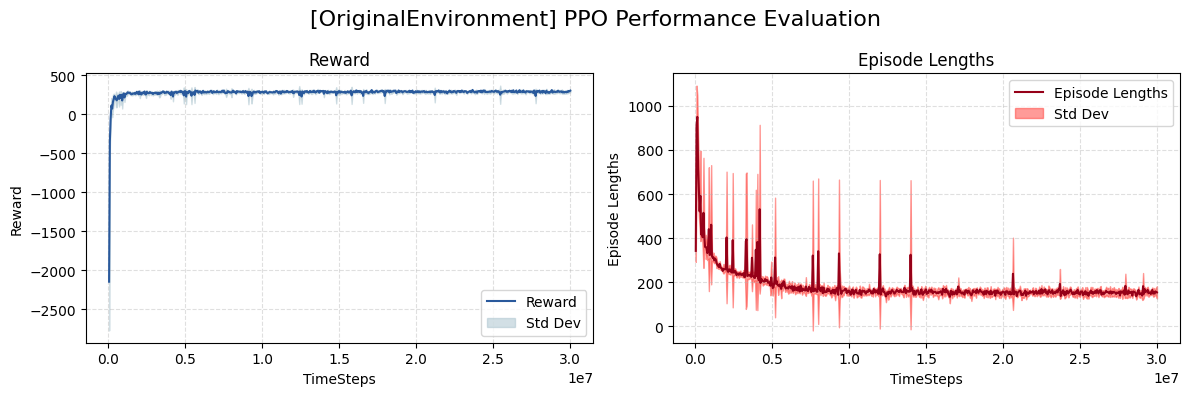

In [9]:
# Evaluate Results
originalSetup1PPOResults = originalSetup1PPO.checkResults()

---
### DQN (Setting 1)
---

The initial settings for the **Deep Q-Network (DQN)** algorithm highlight key principles such as **stability in learning**, **efficient exploration**, and **robust function approximation**:

- **Learning Rate (`learning_rate`)**:
  - Set to `1e-3`, this governs the speed at which the network updates its weights.
  - Balances rapid adaptation with the risk of instability during training.

- **Replay Buffer (`buffer_size`)**:
  - Configured to hold `100,000` experiences, this allows the algorithm to store and replay diverse interactions for stable learning.
  - Essential for breaking correlations in sequential data.

- **Training Start Threshold (`learning_starts`)**:
  - Set to `10,000` steps, ensuring that sufficient experiences are collected before training begins.
  - Prevents premature updates that could destabilize learning.

- **Batch Size (`batch_size`)**:
  - Set to `64`, this defines the number of samples drawn from the replay buffer per update.
  - Balances computational efficiency with gradient stability.

- **Target Network Update (`tau` and `target_update_interval`)**:
  - `tau=1.0` ensures hard updates to the target network.
  - The target network is updated every `10,000` steps, improving stability by preventing rapid policy oscillations.

- **Discount Factor (`gamma`)**:
  - Set to `0.99`, it emphasizes long-term reward optimization, which is critical for decision-making in sequential tasks.

- **Training Frequency (`train_freq`)**:
  - Configured to `4`, the agent trains every 4 steps to balance computational efficiency with training frequency.

- **Exploration Parameters (`exploration_initial_eps`, `exploration_final_eps`, `exploration_fraction`)**:
  - Starts with full exploration (`eps=1.0`), gradually decaying to a minimum of `0.01` over `10%` of the total timesteps.
  - Encourages broad exploration early on, transitioning to exploitation as training progresses.

- **Gradient Clipping (`max_grad_norm`)**:
  - Set to `10.0`, this prevents exploding gradients during updates, maintaining stability.

- **Policy Network Architecture (`policy_kwargs`)**:
  - A neural network with two hidden layers, each containing `128` neurons, is used to approximate the Q-function.
  - This architecture strikes a balance between representational power and computational cost.

<!-- ### Summary
These settings are optimized for stability, efficient exploration, and robust learning, ensuring that the DQN algorithm can effectively navigate the **Lunar Lander** environment. By leveraging techniques such as a replay buffer, target network updates, and controlled exploration decay, the agent is equipped to balance exploration and exploitation while maintaining stable training. -->

In [10]:
# Create a instance of the Lunar Lander Manager
originalSetup1DQN = LunarLanderManager(environmentName=originalEnv, algorithm='DQN', settingsNumber=1, algorithmSettings=DQN_SETTING_1)

In [11]:
# Check if the Environment is working
originalSetup1DQN.testRandomAction()

In [12]:
# Train the Model
model = originalSetup1DQN.train()

Already Trained the Model over the established TimeSteps (Defined inside the CONFIG Dictionary).


In [13]:
# Test the Model over 1 Episode 
originalSetup1DQN.test(numEpisodes=1)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


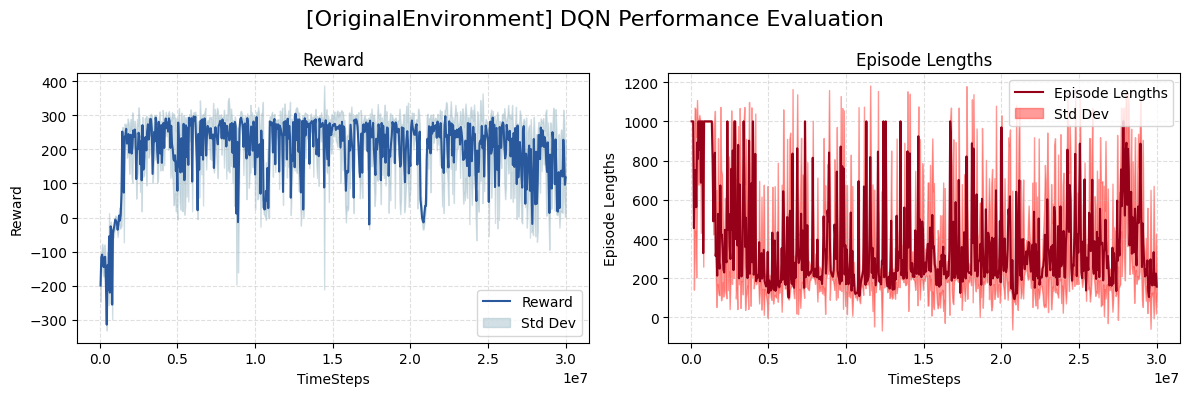

In [14]:
# Evaluate Results
originalSetup1DQNResults = originalSetup1DQN.checkResults()

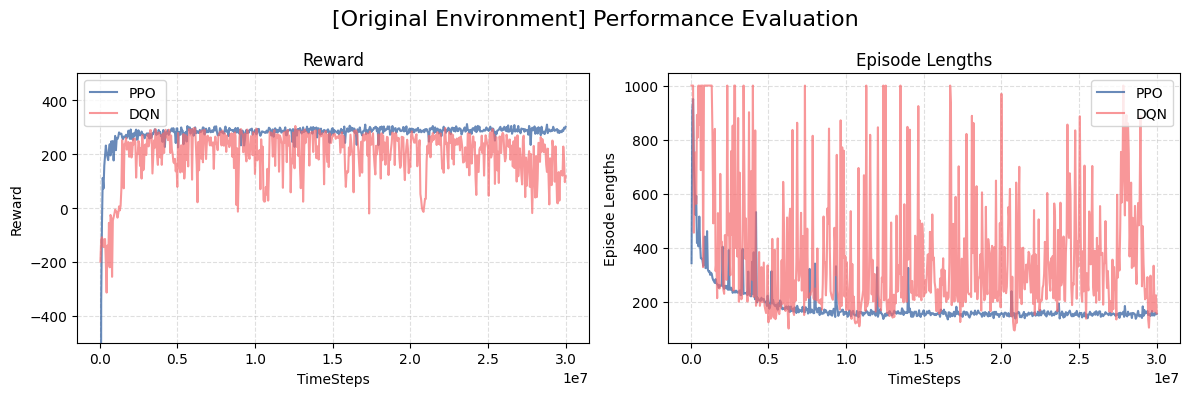

In [15]:
# Plot Training Results of both algorithms
plotModelsTrainingPerformance([
    ('PPO', 'Original', 'Setting-1', originalSetup1PPOResults),
    ('DQN', 'Original', 'Setting-1', originalSetup1DQNResults)
])

> ANALYSE RESULTS

---
## Custom Environment
---

> EXPLAIN WHAT WAS IMPROVED / ADDED TO THE ENVIRONMENT

In [16]:
# Register the Custom Environment
gym.register(
    id="MyLunarLander",
    entry_point=MyLunarLander,
)

# Define the custom environment
customEnv = 'MyLunarLander'

---
### [PPO] Setting-1
---

**Similar** to the approach taken with the original baseline environment, we **applied the same initial settings** for the **PPO algorithm** in this revised version of the ``Lunar Lander environment``.

In [17]:
# Create a instance of the Lunar Lander Manager
customSetup1PPO = LunarLanderManager(environmentName=customEnv, algorithm='PPO', settingsNumber=1, algorithmSettings=PPO_SETTINGS_1)

In [18]:
# Check if the Environment is working
customSetup1PPO.testRandomAction()

In [19]:
# Train the Model
model = customSetup1PPO.train()

Already Trained the Model over the established TimeSteps (Defined inside the CONFIG Dictionary).


In [20]:
# Test the Model over 1 Episode 
customSetup1PPO.test(numEpisodes=1)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


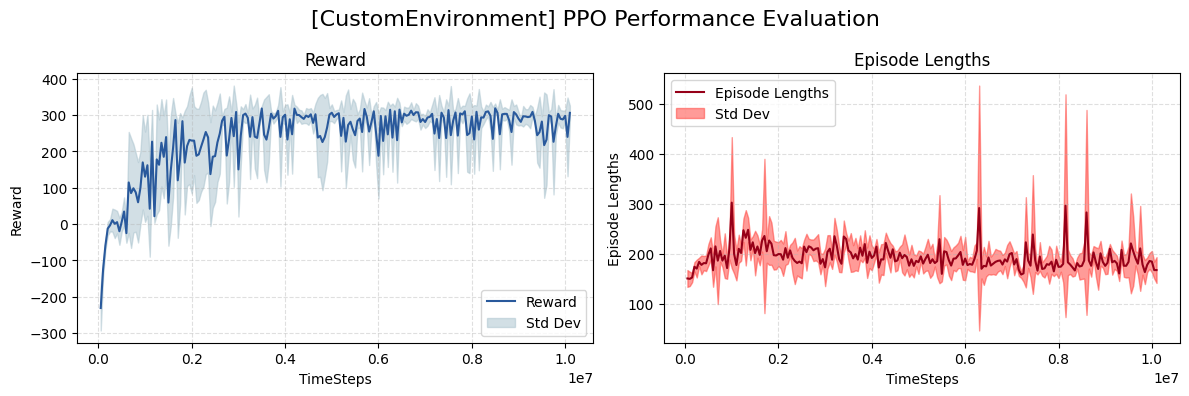

In [21]:
# Evaluate Results
customSetup1PPOResults = customSetup1PPO.checkResults()

> ANALYSE RESULTS

---
### [PPO] Setting-2
---

To thoroughly evaluate the PPO algorithm’s performance in the Lunar Lander environment, we introduced a series of **targeted modifications** to its hyperparameters. These adjustments aim to *balance exploration with long-term reward optimization** and improve the agent's overall stability and performance.

#### Key Modifications:

1. **Number of Steps per Rollout (`n_steps`)**  
   - **Value:** Increased to 4,096  
   - **Purpose:** Allows the agent to collect more extensive experience before updating its policy, particularly beneficial for tasks requiring delayed rewards like smooth landings.

2. **Discount Factor (`gamma`)**  
   - **Value:** Increased to 0.999  
   - **Purpose:** Prioritizes future rewards, encouraging the agent to adopt long-term strategies over short-term gains.

3. **Batch Size**  
   - **Value:** Increased to 128  
   - **Purpose:** Reduces gradient variance, leading to more stable learning.

4. **Number of Training Epochs (`n_epochs`)**  
   - **Value:** Increased to 15  
   - **Purpose:** Ensures thorough learning from each batch of experiences.

5. **Entropy Coefficient (`ent_coef`)**  
   - **Value:** Adjusted to 0.01  
   - **Purpose:** Promotes diverse exploration, mitigating the risk of premature convergence in the complex reward landscape of Lunar Lander.

<!-- #### Summary of Improvements
These modifications collectively aim to:
- Enhance learning stability and reward sensitivity.
- Encourage robust exploration to avoid suboptimal policies.
- Enable a comprehensive evaluation of PPO’s potential in addressing the challenges of the Lunar Lander environment. -->

In [ ]:
# Create a instance of the Lunar Lander Manager
customSetup2PPO = LunarLanderManager(environmentName=customEnv, algorithm='PPO', settingsNumber=2, algorithmSettings=PPO_SETTINGS_2)

In [ ]:
# Check if the Environment is working
customSetup2PPO.testRandomAction()

In [ ]:
# Train the Model
model = customSetup2PPO.train()

In [ ]:
# Test the Model over 1 Episode 
# ppoSetup1.test(model=model, numEpisodes=1)
customSetup2PPO.test(model=model, numEpisodes=1)

In [ ]:
# Evaluate Results
customSetup2PPOResults = customSetup2PPO.checkResults()

> ANALYSE RESULTS

---
### [PPO] Settings Impact Evaluation
---

After training the ``PPO model`` under the two previously discussed **configurations**, we now need to evaluate how those **changes impacted** the agent's performance.

In [ ]:
# Compare the results obtained for both settings
plotModelSettingsPerformance([
    ('PPO', 'Custom', 'Settings-1', customSetup1PPOResults),
    ('PPO', 'Custom', 'Settings-2', customSetup2PPOResults),
])

> ADD TEXT REGARDING THE SETTINGS INFLUENCE ON THE MODEL'S PERFORMANCE

---
### [DQN] Setting-1
---

As with the **original baseline environment**, we chose to apply the same **initial settings** for the DQN algorithm in this **updated version** of the ``Lunar Lander environment``.

In [ ]:
# Create a instance of the Lunar Lander Manager
customSetup1DQN = LunarLanderManager(environmentName=customEnv, algorithm='DQN', settingsNumber=1, algorithmSettings=DQN_SETTING_1)

In [ ]:
# Check if the Environment is working
customSetup1DQN.testRandomAction()

In [ ]:
# Train the Model
model = customSetup1DQN.train()

In [ ]:
# Test the Model over 1 Episode 
customSetup1DQN.test(model=model, numEpisodes=1)

In [ ]:
# Evaluate Results
customSetup1DQNResults = customSetup1DQN.checkResults()

---
### [DQN] Setting-2
---

To enhance the performance of the Deep Q-Network (DQN) algorithm in the **Lunar Lander** environment, the following modifications were introduced. These changes aim to improve stability, exploration efficiency, and learning robustness while addressing potential challenges inherent to the environment.

#### Key Modifications:

1. **Learning Rate (`learning_rate = 5e-4`)**
    - **Description**: The learning rate was reduced from `1e-3` to `5e-4`.
    - **Impact**: A smaller learning rate slows down weight updates, preventing the algorithm from overreacting to noisy gradient estimates. This enhances training stability and ensures smoother convergence.

2. **Replay Buffer Size (`buffer_size = 500,000`)**
    - **Description**: The replay buffer size was increased from `100,000` to `500,000`.
    - **Impact**: A larger buffer stores a more diverse set of experiences, reducing the risk of overfitting to recent interactions and enabling better generalization. This is particularly important in environments with varied state transitions like Lunar Lander.

3. **Training Start Threshold (`learning_starts = 5,000`)**
    - **Description**: The number of steps before training begins was reduced from `10,000` to `5,000`.
    - **Impact**: Starting training earlier accelerates the learning process, especially if the environment provides sufficient rewards or meaningful state transitions early in episodes.

4. **Discount Factor (`gamma = 0.95`)**
    - **Description**: The discount factor was reduced from `0.99` to `0.95`.
    - **Impact**: This adjustment focuses the algorithm on optimizing more immediate rewards, which can be beneficial in environments where long-term rewards are uncertain or sparse.
  
5. **Soft Target Updates (`tau = 0.01`)**
    - **Description**: The hard target updates were replaced with soft updates using Polyak averaging (`tau = 0.01`).
    - **Impact**: Soft updates ensure smoother and more gradual changes to the target network, reducing oscillations and stabilizing training.

6. **Training Frequency (`train_freq = 2`)**
    - **Description**: The training frequency was increased from every 4 steps to every 2 steps.
    - **Impact**: Training more frequently enables the algorithm to update its policy sooner, improving responsiveness to changes in the environment dynamics.

7. **Target Update Interval (`target_update_interval = 20,000`)**
    - **Description**: The interval for updating the target network was increased from `10,000` to `20,000` steps.
    - **Impact**: Less frequent updates to the target network provide a more stable learning signal, as the policy network trains against a consistent target for a longer duration.

8. **Exploration Parameters**
    - **Exploration Final Epsilon (`exploration_final_eps = 0.05`)**:
      - The minimum exploration rate was increased from `0.01` to `0.05`.
      - **Impact**: A slightly higher final epsilon ensures continued exploration, preventing premature convergence to suboptimal policies.
    - **Exploration Fraction (`exploration_fraction = 0.2`)**:
      - The exploration period was extended from 10% to 20% of total timesteps.
      - **Impact**: A longer exploration phase allows the agent to better explore the environment before focusing on exploitation, which is crucial in complex tasks like Lunar Lander.

9. **Gradient Clipping (`max_grad_norm = 5.0`)**
    - **Description**: The gradient clipping threshold was reduced from `10.0` to `5.0`.
    - **Impact**: Lower gradient clipping prevents excessively large updates, further stabilizing the training process, especially in environments with steep reward gradients.

10. **Neural Network Architecture (`policy_kwargs = dict(net_arch=[256, 256])`)**
    - **Description**: The policy network was modified to have a deeper architecture with two hidden layers of 256 neurons each.
    - **Impact**: A larger network improves the algorithm's capacity to approximate complex Q-functions, which can be necessary for environments with high-dimensional state spaces like Lunar Lander.

<!-- ### Summary of Modifications
These modifications aim to improve the DQN algorithm's performance by:
- Enhancing **stability** through smaller learning rates, soft target updates, and gradient clipping.
- Encouraging **better exploration** with extended exploration phases and higher final epsilon values.
- Improving **learning efficiency** with increased replay buffer size, more frequent training, and a deeper network architecture.

Together, these changes help the algorithm better handle the complexities of the Lunar Lander environment, enabling it to learn more robust and effective policies. -->

In [22]:
# Create a instance of the Lunar Lander Manager
customSetup2DQN = LunarLanderManager(environmentName=customEnv, algorithm='DQN', settingsNumber=2, algorithmSettings=DQN_SETTING_2)

In [23]:
# Check if the Environment is working
customSetup2DQN.testRandomAction()

In [24]:
# Train the Model
model = customSetup2DQN.train()

Already Trained the Model over the established TimeSteps (Defined inside the CONFIG Dictionary).


In [25]:
# Test the Model over 1 Episode 
customSetup2DQN.test(model=model, numEpisodes=1)

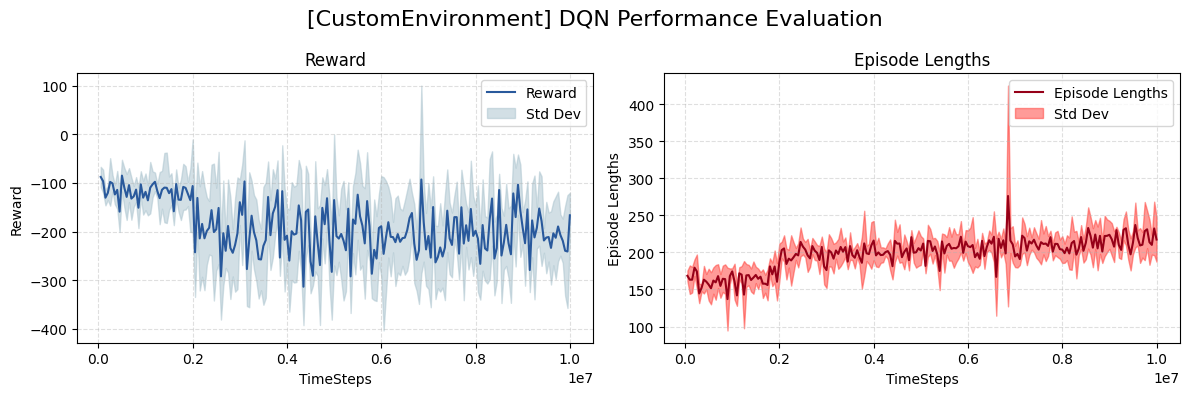

In [26]:
# Evaluate Results
customSetup2DQNResults = customSetup2DQN.checkResults()

> ANALYSE RESULTS

---
### [DQN] Settings Impact Evaluation
---
Once again, after training the ``DQN model`` under the two previously discussed **configurations**, we now need to evaluate how those **changes impacted** the agent's performance.

In [ ]:
# Compare the results obtained for both settings
plotModelSettingsPerformance([
    ('DQN', 'Custom', 'Settings-1', customSetup1DQNResults),
    ('DQN', 'Custom', 'Settings-2', customSetup2DQNResults),
])

> ADD TEXT REGARDING THE SETTINGS INFLUENCE ON THE MODEL'S PERFORMANCE

In [ ]:
# Plot overall study
# plotModelsOverallPerformances(
#     originalEnvResults=[
#         ('PPO', 'Settings-1', originalSetup1PPOResults),
#         ('DQN', 'Settings-1', originalSetup1DQNResults)
#     ],
#     customEnvResults=[
#         ('PPO', 'Settings-1', customSetup1PPOResults),
#         ('PPO', 'Settings-2', customSetup2PPOResults),
#         ('DQN', 'Settings-1', customSetup1DQNResults),
#         ('DQN', 'Settings-2', customSetup2DQNResults),
#     ])

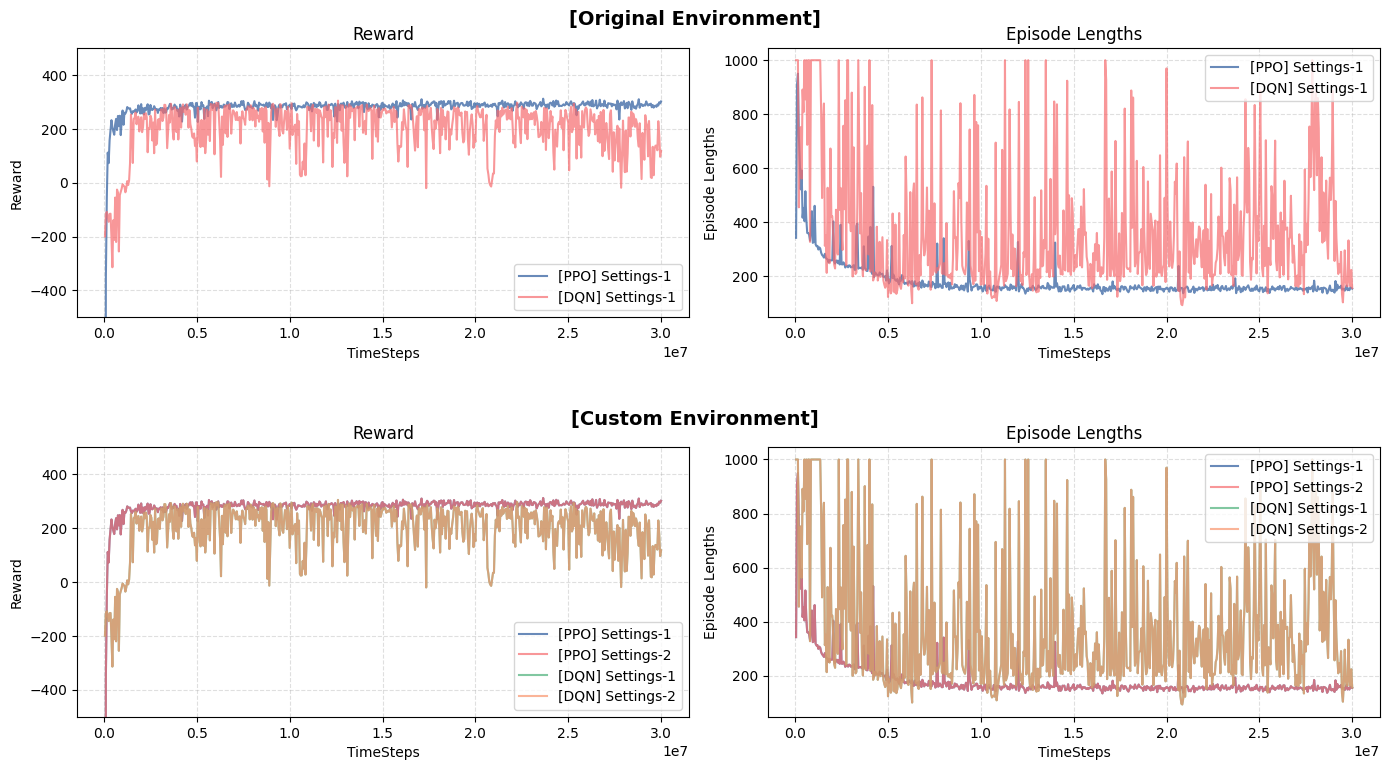

In [28]:
# Plot overall study [DUMMY DATA]
plotModelsOverallPerformances(
    originalEnvResults=[
        ('PPO', 'Settings-1', originalSetup1PPOResults),
        ('DQN', 'Settings-1', originalSetup1DQNResults)
    ],
    customEnvResults=[
        ('PPO', 'Settings-1', originalSetup1PPOResults),
        ('PPO', 'Settings-2', originalSetup1PPOResults),
        ('DQN', 'Settings-1', originalSetup1DQNResults),
        ('DQN', 'Settings-2', originalSetup1DQNResults),
    ])

---
## Final Considerations

$\quad$ If there is any difficulty on downloading or executing this project, please contact us via:

- **Email**:
    - [Gonçalo Esteves](https://github.com/EstevesX10) &#8594; `up202203947@edu.fc.up.pt`
    - [Nuno Gomes](https://github.com/NightF0x26) &#8594; `up202206195@edu.fc.up.pt`
    - [Pedro Afonseca](https://github.com/PsuperX) &#8594; `up202205394@edu.fc.up.pt`